In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
x_train = tf.image.resize(x_train, (75, 75))
x_test = tf.image.resize(x_test, (75, 75))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 65s 0us/step


In [5]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)
for layer in base_model.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=64)

782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 97ms/step - accuracy: 0.5261 - loss: 1.3680 - val_accuracy: 0.6195 - val_loss: 1.0961


In [9]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step


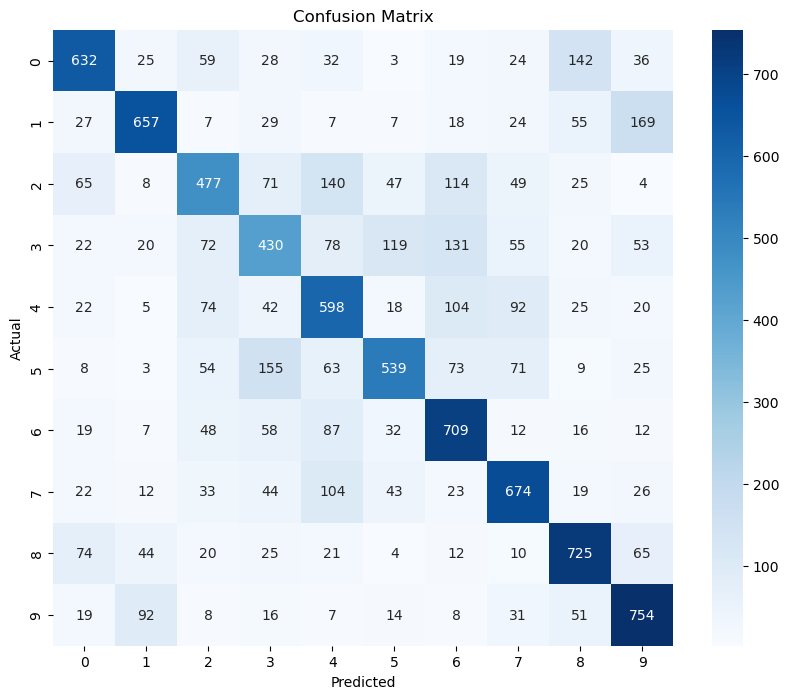

In [11]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
class_report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66      1000
           1       0.75      0.66      0.70      1000
           2       0.56      0.48      0.52      1000
           3       0.48      0.43      0.45      1000
           4       0.53      0.60      0.56      1000
           5       0.65      0.54      0.59      1000
           6       0.59      0.71      0.64      1000
           7       0.65      0.67      0.66      1000
           8       0.67      0.72      0.69      1000
           9       0.65      0.75      0.70      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000



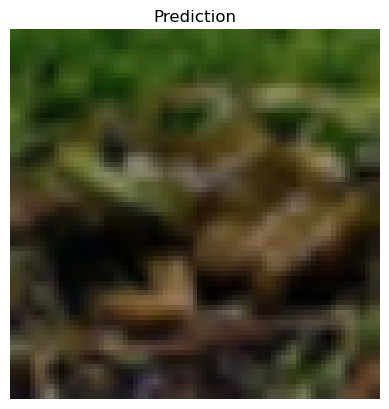

True Label: 6
Predicted Label: 4


In [17]:
sample_index = np.random.randint(0, len(x_test))
sample_image = x_test[sample_index]
sample_true_label = np.argmax(y_test[sample_index])
sample_pred_label = np.argmax(y_pred[sample_index])
plt.imshow(sample_image)
plt.title("Prediction")
plt.axis('off')
plt.show()
print(f"True Label: {sample_true_label}")
print(f"Predicted Label: {sample_pred_label}")